In [44]:
import numpy as np


import open3d as o3d
import laspy


In [129]:
### TEST DATA FILENAMES 
#VAL FILES
filename = "PUNKTSKY_00005_1km_6220_495" # OKAY EVEN THO IT IS SRAIGHT LINE
filename = "PUNKTSKY_00005_1km_6221_452" # REALLY BAD EVEN THO IT IS SRAIGHT LINE
# TEST FILES
filename = "PUNKTSKY_00005_1km_6219_494" 
filename = "PUNKTSKY_00005_1km_6211_474"
# # Five new files 
filename = "PUNKTSKY_00004_1km_6105_518"
# filename = "PUNKTSKY_00004_1km_6106_492"
filename = "PUNKTSKY_00004_1km_6106_493"
# filename = "PUNKTSKY_00004_1km_6106_494"
# filename = "PUNKTSKY_00004_1km_6106_510"

In [130]:
model_to_check = "houghSEU18_20_ones"
model_to_check_loss = "houghSEU18_20_ones_loss"

# eval_file = "/home/jfriis/msc_data/eval/"+filename+".laz"
# data_val_path_file = "/home/jf/data/denmark/raw/val/"+filename+".laz"
#data_test_path_file = "/home/jf/data/denmark/raw/test/"+filename+".laz"
# eval_file = "/home/jf/eval/macc_ones/"+filename+".laz"
# eval_file = "/home/jf/eval/miou_ones/"+filename+".laz"
# eval_file = "/home/jf/eval/loss_ones/"+filename+".laz"
# eval_file = "/home/jf/data/denmark/raw/test/"+filename+".laz"
eval_file = f"/home/jf/eval/{model_to_check}/"+filename+".laz"
eval_file_loss = f"/home/jf/eval/{model_to_check}/"+filename+".laz"



In [142]:
all_eval_data = laspy.read(eval_file, laz_backend=laspy.compression.LazBackend.LazrsParallel)
mask1 = ((all_eval_data.classification == 14 ) & (all_eval_data.prediction == 0))
mask2 = ((all_eval_data.classification != 14 ) & (all_eval_data.prediction == 1))
label_data = all_eval_data[mask1 | mask2]

pred_data = all_eval_data[all_eval_data.prediction == 1]
pred_data = all_eval_data[(all_eval_data.classification == 14 ) & (all_eval_data.prediction == 0)]
# label_data = all_eval_data[all_eval_data.classification == 14]

4095


In [133]:
# all_eval_data_loss = laspy.read(eval_file_loss, laz_backend=laspy.compression.LazBackend.LazrsParallel)
# pred_data_loss = all_eval_data_loss[all_eval_data_loss.prediction == 1]
# label_data_loss = all_eval_data_loss[all_eval_data_loss.classification == 14]

In [143]:
all_point_data = np.stack([all_eval_data.X, all_eval_data.Y, all_eval_data.Z], axis=0).transpose((1, 0))
print(all_point_data.shape)
pred_point_data = np.stack([pred_data.X, pred_data.Y, pred_data.Z], axis=0).transpose((1, 0))
print(pred_point_data.shape)
label_point_data = np.stack([label_data.X, label_data.Y, label_data.Z], axis=0).transpose((1, 0))
print(label_point_data.shape)

(29798574, 3)
(564, 3)
(679, 3)


In [126]:
geom = o3d.geometry.PointCloud()
geom.points = o3d.utility.Vector3dVector(all_point_data)
o3d.visualization.draw_geometries([geom])

In [141]:
geom = o3d.geometry.PointCloud()
geom.points = o3d.utility.Vector3dVector(pred_point_data)
o3d.visualization.draw_geometries([geom])

In [128]:
geom = o3d.geometry.PointCloud()
geom.points = o3d.utility.Vector3dVector(label_point_data)
o3d.visualization.draw_geometries([geom])

In [18]:
list(all_eval_data.point_format.dimension_names)

['X',
 'Y',
 'Z',
 'intensity',
 'return_number',
 'number_of_returns',
 'synthetic',
 'key_point',
 'withheld',
 'overlap',
 'scanner_channel',
 'scan_direction_flag',
 'edge_of_flight_line',
 'classification',
 'user_data',
 'scan_angle',
 'point_source_id',
 'gps_time',
 'red',
 'green',
 'blue',
 'ClassFlags',
 'Amplitude',
 'Reflectance',
 'Deviation',
 'prediction']

In [19]:
print(np.unique(pred_data.HeightAboveGround))
rounded_to_10cm = np.around(pred_data.HeightAboveGround, decimals=1)
print(rounded_to_10cm)

AttributeError: LasData object has no attribute 'HeightAboveGround'

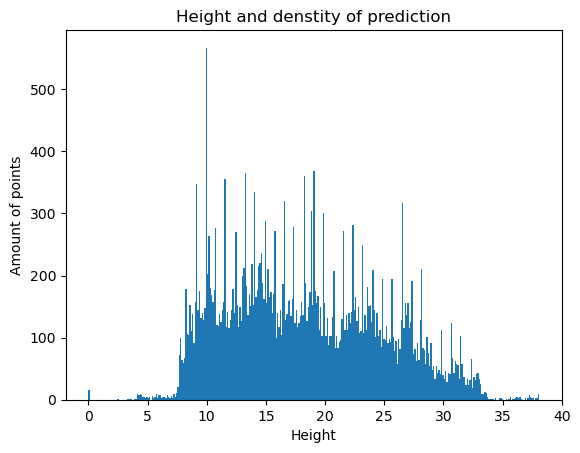

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some data
rounded_to_10cm = np.around(pred_data.HeightAboveGround, decimals=1)
# Compute the histogram with numpy
hist, bin_edges = np.histogram(rounded_to_10cm, bins=len(np.unique(rounded_to_10cm)))

# Plot the histogram with matplotlib
plt.hist(bin_edges[:-1], bin_edges, weights=hist)
plt.title("Height and denstity of prediction")
plt.xlabel("Height")
plt.ylabel("Amount of points")
plt.show()
